# **Store Item Demand Forecasting Analysis**

Data source: [Store Item Demand Forecasting](https://www.kaggle.com/competitions/demand-forecasting-kernels-only)

Installing Libraries: 
* Using pip:
    - `pip install numpy pandas matplotlib seaborn plotly scikit-learn scipy`
* Using uv:
    - `uv add numpy pandas matplotlib seaborn plotly scikit-learn scipy`

## **Data Description**

* date - Date of the sale data. There are no holiday effects or store closures.
* store - Store ID
* item - Item ID
* sales - Number of items sold at a particular store on a particular date

Importing necessary libraries

In [ ]:
import numpy as np 
import scipy.stats as st
import pandas as pd 

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the data

path = "./datasets/train.csv"

store = pd.read_csv(path)

In [3]:
store.head()

date  store  item  sales
0  2013-01-01      1     1     13
1  2013-01-02      1     1     11
2  2013-01-03      1     1     14
3  2013-01-04      1     1     13
4  2013-01-05      1     1     10

In [4]:
print(f"Number of rows in the store data: {store.shape[0]}")
print(f"Number of columns in the store data: {store.shape[1]}")

Number of rows in the store data: 913000
Number of columns in the store data: 4


In [5]:
# info of the data

store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


* There are no null values in the store data
* Need to change the datatype of data

In [6]:
 # changing the datetype

store['date'] = pd.to_datetime(store['date'])

In [7]:
# date type

store['date'].dtype

dtype('<M8[ns]')

In [8]:
# summary stats of the store data

store.describe()

date          store           item  \
count                         913000  913000.000000  913000.000000   
mean   2015-07-02 11:59:59.999999744       5.500000      25.500000   
min              2013-01-01 00:00:00       1.000000       1.000000   
25%              2014-04-02 00:00:00       3.000000      13.000000   
50%              2015-07-02 12:00:00       5.500000      25.500000   
75%              2016-10-01 00:00:00       8.000000      38.000000   
max              2017-12-31 00:00:00      10.000000      50.000000   
std                              NaN       2.872283      14.430878   

               sales  
count  913000.000000  
mean       52.250287  
min         0.000000  
25%        30.000000  
50%        47.000000  
75%        70.000000  
max       231.000000  
std        28.801144

* start date of sale noted is: 01/01/2013
* end date of sale noted is: 31/12/2017
* So there is 5 years of data

* Stores count = 10
* Number of items = 50

* minimum sale value = 0
* maximum sale value = 231

In [9]:
# unique value counts

print(f"Number of unique stores: {store['store'].nunique()}")

Number of unique stores: 10


Some key factors about this dataset:

* Number of rows: 913k
* Just three columns: store, item and sales.
* Fifty different items and ten stores
* Sales are measured for each item, store and date (daily)
* Five years time frame (2013/01/01 to 2017/12/31)
* No missing data

* The store and item columns are in the range 1 to 10 and 1 to 50 respectively.
* Sales values are in the range 0 to 231 with 52.25 mean

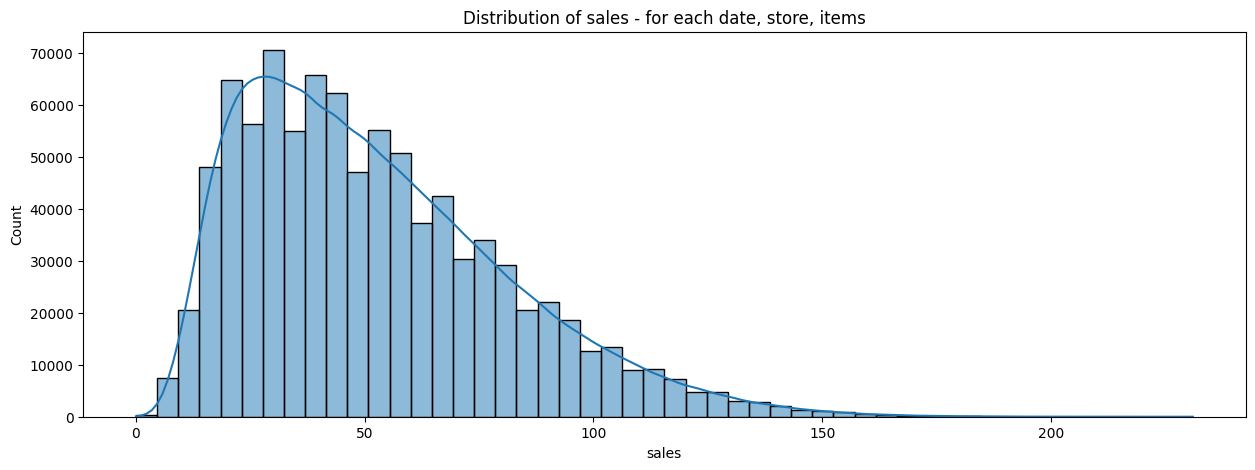

In [10]:
# distribution of sales

plt.figure(figsize=(15, 5))
sns.histplot(store['sales'], bins=50,  kde=True)
plt.title('Distribution of sales - for each date, store, items')
plt.show()

Sales is positively skewed

* more sales happened b/w the rang of 0 to 50

The p-value of the sales distribution is: 0.0


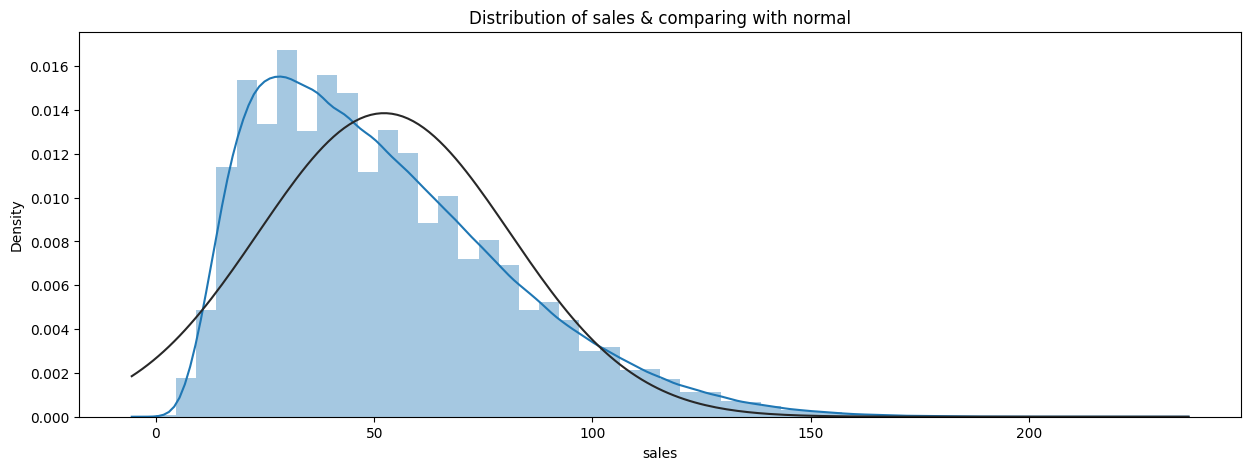

In [11]:
# comparing with the normal distribution

print(f"The p-value of the sales distribution is: {st.normaltest(store.sales.values)[1]}")

plt.figure(figsize=(15, 5))
sns.distplot(store.sales, fit= st.norm, kde=True)
plt.title('Distribution of sales & comparing with normal')
plt.show()

In the above plot, the green line represents our sales distribution, while the black line is the best normal distribution we can fit to our data. The p-value indicates that the null hypothesis can be rejected and therefore our data dont fit a normal distribution.

In [12]:
# Average monthly sales for all stores and items

monthly_df = store.groupby([store.date.dt.year, store.date.dt.month])['sales'].mean()

In [13]:
monthly_df

date  date
2013  1       29.348645
      2       32.815500
      3       39.831097
      4       45.484933
      5       49.241419
      6       53.039800
      7       55.220774
      8       49.468452
      9       45.993800
      10      42.360452
      11      46.176200
      12      32.684323
2014  1       33.934645
      2       37.794071
      3       45.438774
      4       52.594267
      5       56.959806
      6       60.456133
      7       63.807097
      8       57.135226
      9       52.341600
      10      48.960194
      11      53.385533
      12      37.293419
2015  1       35.646000
      2       39.379786
      3       47.158129
      4       54.964467
      5       59.800129
      6       62.478933
      7       66.925806
      8       59.380710
      9       54.888800
      10      51.435677
      11      55.176333
      12      39.198194
2016  1       38.867032
      2       42.410828
      3       51.024581
      4       60.130000
      5       63.789032
     

In [14]:
monthly_df.index = monthly_df.index.set_names(['year', 'month'])
monthly_df = monthly_df.reset_index()


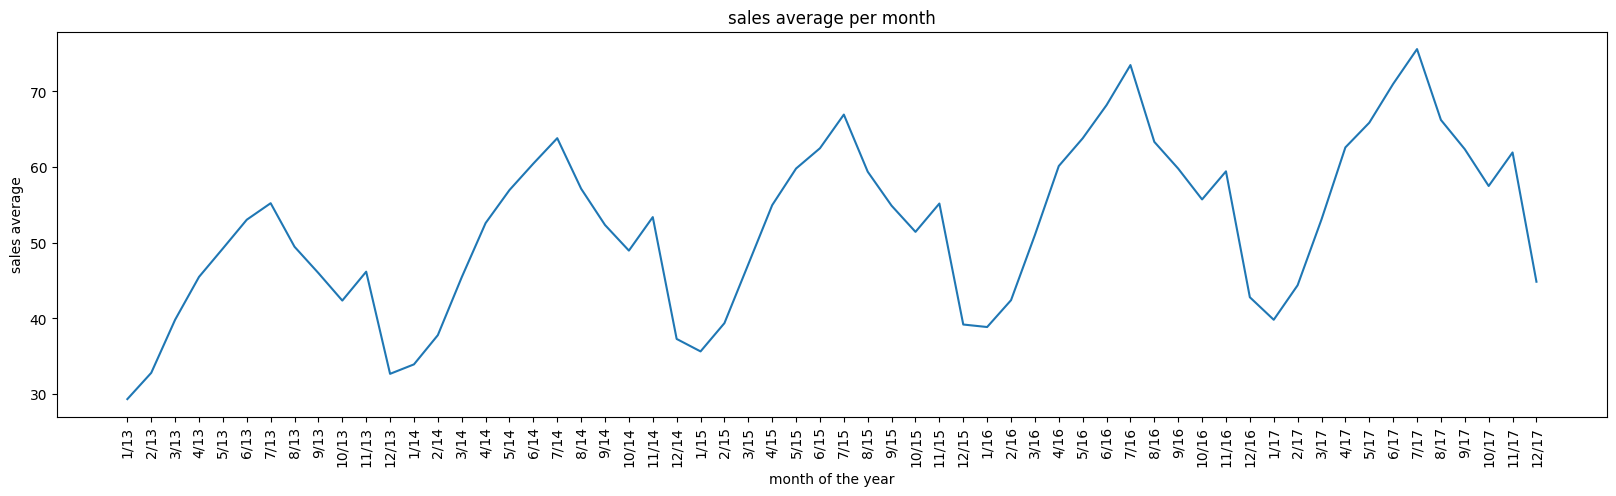

In [64]:
x_axis = []
for y in range(13, 18):
    for m in range(1,13):
        x_axis.append(f"{m}/{y}")
plt.figure(figsize=(20,5))
sns.lineplot(x = x_axis, y = monthly_df.sales, markers='o')
plt.title('sales average per month')
plt.xlabel('month of the year')
plt.ylabel('sales average')
plt.xticks(rotation = 90)
plt.show()


In [67]:
px.line(monthly_df, x = x_axis, y = monthly_df.sales, title = "monthly average sales", markers='o').show()

We can observe that,
* For every 7th month, the average sale is peak of that year
* for every 1st, 12th months,the average sale is very low for that year

In [73]:
# total sales by year

year_df = store.groupby(store.date.dt.year)['sales'].sum().to_frame()

In [75]:
year_df

sales
date          
2013   7941243
2014   9135482
2015   9536887
2016  10357160
2017  10733740

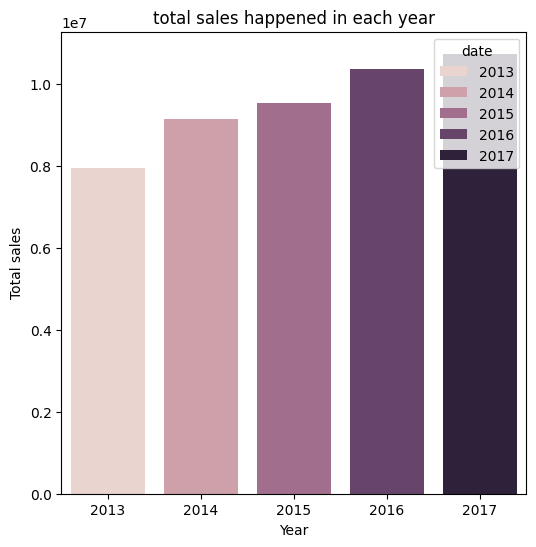

In [74]:
plt.figure(figsize=(6,6))
sns.barplot(data=year_df, x=year_df.index, y = 'sales', hue=year_df.index)
plt.title('total sales happened in each year')
plt.xlabel('Year')
plt.ylabel('Total sales')
plt.show()

As the year grows, the total combined sales of all the stores is increases

In [77]:
# using plotly

px.bar(x=year_df.index, y = year_df.sales, color = year_df.index, title="total sales each year"
       , text_auto=True).show()

Average sales per month and store

In [78]:
monthly_df_store = store.groupby([store.date.dt.year, store.date.dt.month, 'store']).mean()

In [79]:
monthly_df_store

date  item      sales
date date store                            
2013 1    1     2013-01-16  25.5  26.501290
          2     2013-01-16  25.5  37.754839
          3     2013-01-16  25.5  33.530323
          4     2013-01-16  25.5  30.787097
          5     2013-01-16  25.5  22.196774
...                    ...   ...        ...
2017 12   6     2017-12-16  25.5  33.868387
          7     2017-12-16  25.5  31.125806
          8     2017-12-16  25.5  55.081290
          9     2017-12-16  25.5  47.269032
          10    2017-12-16  25.5  50.225806

[600 rows x 3 columns]

In [80]:
monthly_df_store.index = monthly_df_store.index.set_names(['year', 'month', 'store'])
monthly_df_store = monthly_df_store.reset_index()

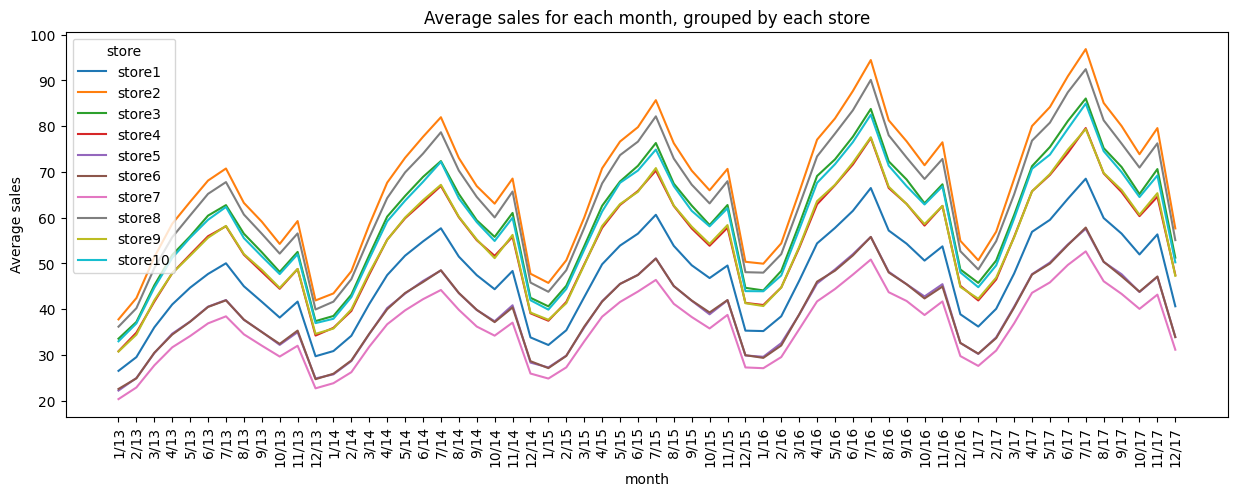

In [97]:
x_axis = []
for y in range(13, 18):
    for m in range(1,13):
        x_axis.append(f"{m}/{y}")

plt.figure(figsize=(15,5))
for i in range(1,11):
    store_data = monthly_df_store[monthly_df_store['store'] == i]
    sns.lineplot(x=x_axis, y=store_data['sales'], markers=True, label = f'store{i}')
plt.title("Average sales for each month, grouped by each store")
plt.xlabel('month')
plt.ylabel('Average sales')
plt.legend(title = 'store')
plt.xticks(rotation = 90)
plt.show()

We can observe that,
* minimum average monthly sales held in store 7
* maximum average monthly sales held in store 2
* average monthly sales of stores 4 and 9 are similar
* average monthly sales of stores 3 and 10 are similar

* all stores followed the same tread of average monthly sales

Total sales by store

In [119]:
store_total_sales = store.groupby('store')['sales'].sum().to_frame().reset_index()

In [120]:
store_total_sales

store    sales
0      1  4315603
1      2  6120128
2      3  5435144
3      4  5012639
4      5  3631016
5      6  3627670
6      7  3320009
7      8  5856169
8      9  5025976
9     10  5360158

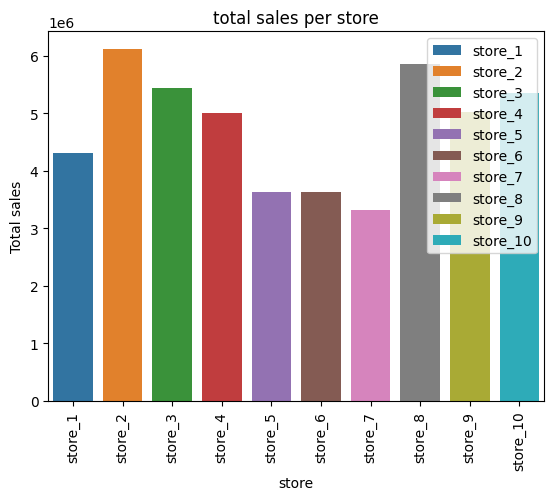

In [121]:
store_names = [f"store_{i}" for i in range(1,11)]

sns.barplot(x=store_total_sales['store'], y = store_total_sales['sales'], hue = store_names)
plt.ylabel('Total sales')
plt.xlabel('store')
plt.title('total sales per store')
plt.xticks(np.arange(0,10), store_names, rotation = 90)

plt.show()

In [124]:
# using plotly

px.bar(x=store_total_sales.store, y = store_total_sales.sales, color=store_names, title="total sales per store", text_auto=True).show()

We can observe that,
* maximum total sales achieved by the store 2
* minimum total sales achieved by store 7
* total sales of stores 5, 6 are nearly equal

Box plot

In [139]:
store_sum = store.groupby(['store', 'date'])['sales'].sum()

In [140]:
# for checking

store[(store['store'] == 1) & (store['date'] == '2013-01-01')]

date  store  item  sales
0      2013-01-01      1     1     13
18260  2013-01-01      1     2     33
36520  2013-01-01      1     3     15
54780  2013-01-01      1     4     10
73040  2013-01-01      1     5     11
91300  2013-01-01      1     6     31
109560 2013-01-01      1     7     25
127820 2013-01-01      1     8     33
146080 2013-01-01      1     9     18
164340 2013-01-01      1    10     37
182600 2013-01-01      1    11     37
200860 2013-01-01      1    12     33
219120 2013-01-01      1    13     37
237380 2013-01-01      1    14     22
255640 2013-01-01      1    15     42
273900 2013-01-01      1    16     14
292160 2013-01-01      1    17     13
310420 2013-01-01      1    18     38
328680 2013-01-01      1    19     15
346940 2013-01-01      1    20     22
365200 2013-01-01      1    21     22
383460 2013-01-01      1    22     59
401720 2013-01-01      1    23     14
419980 2013-01-01      1    24     41
438240 2013-01-01      1    25     59
456500 2013-01-01      1    26     16
474760 2013-01-01      1    27     14
493020 2013-01-01      1    28     49
511280 2013-01-01      1    29     34
529540 2013-01-01      1    30     17
547800 2013-01-01      1    31     30
566060 2013-01-01      1    32     22
584320 2013-01-01      1    33     37
602580 2013-01-01      1    34     23
620840 2013-01-01      1    35     28
639100 2013-01-01      1    36     49
657360 2013-01-01      1    37     16
675620 2013-01-01      1    38     21
693880 2013-01-01      1    39     25
712140 2013-01-01      1    40     19
730400 2013-01-01      1    41      6
748660 2013-01-01      1    42     21
766920 2013-01-01      1    43     22
785180 2013-01-01      1    44     20
803440 2013-01-01      1    45     37
821700 2013-01-01      1    46     30
839960 2013-01-01      1    47     17
858220 2013-01-01      1    48     21
876480 2013-01-01      1    49     18
894740 2013-01-01      1    50     30

In [141]:
store_sum

store  date      
1      2013-01-01    1316
       2013-01-02    1264
       2013-01-03    1305
       2013-01-04    1452
       2013-01-05    1499
                     ... 
10     2017-12-27    2221
       2017-12-28    2429
       2017-12-29    2687
       2017-12-30    2742
       2017-12-31    2939
Name: sales, Length: 18260, dtype: int64

In [142]:
store_sum = store_sum.reset_index()

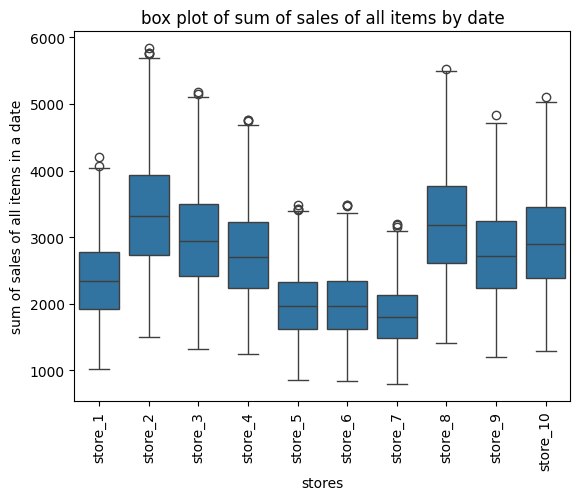

In [146]:
sns.boxplot(data=store_sum, x='store', y = 'sales')
plt.xlabel('stores')
plt.ylabel('sum of sales of all items in a date')
plt.xticks(np.arange(0,10), store_names, rotation = 90)
plt.title("box plot of sum of sales of all items by date")
plt.show()

In [149]:
# plotly

px.box(store_sum, x=store_sum['store'], y=store_sum['sales'], color=store_sum['store']).show()

Sales by item

In [ ]:
item_total = store.groupby('item')['sales'].sum().to_frame().reset_index()

In [153]:
item_total = item_total.sort_values('sales', ascending=False)

In [154]:
item_total

item    sales
14    15  1607442
27    28  1604713
12    13  1539621
17    18  1538876
24    25  1473334
44    45  1471467
37    38  1470330
21    22  1469971
35    36  1406548
7      8  1405108
9     10  1337133
10    11  1271925
11    12  1271534
28    29  1271240
32    33  1270183
23    24  1205975
49    50  1203009
34    35  1201541
13    14  1071531
30    31  1070845
45    46  1070764
1      2  1069564
6      7  1068777
5      6  1068281
8      9   938379
47    48   937703
42    43   936635
25    26   869981
19    20   867641
31    32   803107
38    39   801311
18    19   736892
29    30   736554
20    21   736190
41    42   669925
2      3   669087
16    17   602486
43    44   536811
48    49   535663
22    23   534979
36    37   534258
39    40   534094
33    34   469935
15    16   468480
26    27   402628
3      4   401907
46    47   401781
40    41   401759
0      1   401384
4      5   335230

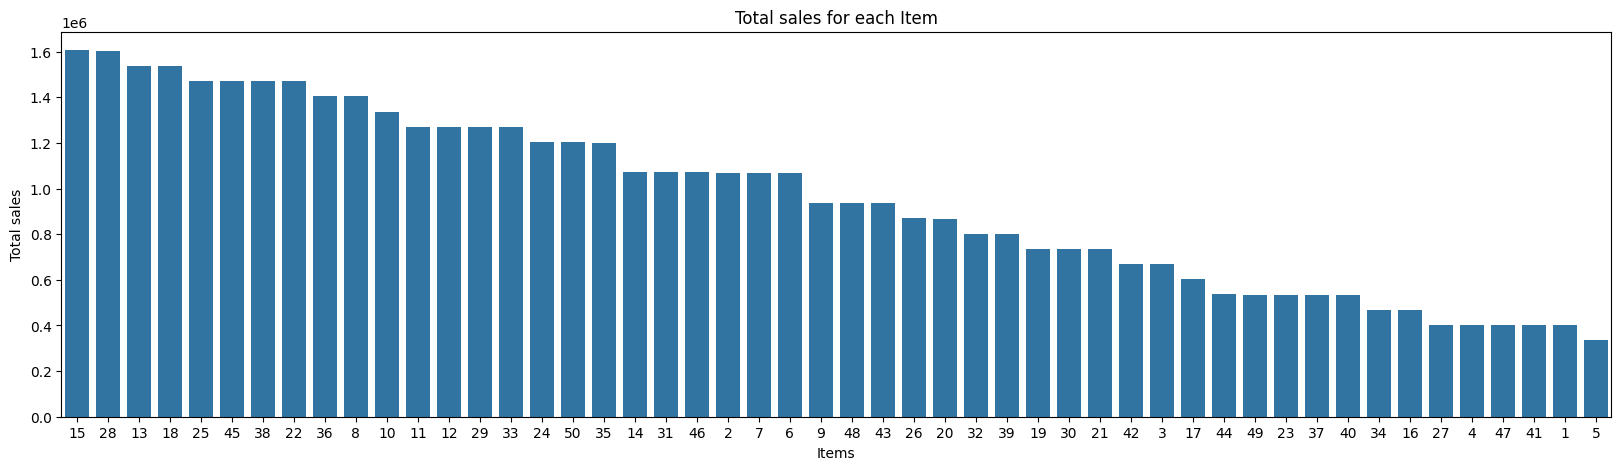

In [159]:
# box plot
item_total = item_total.sort_values('sales', ascending=False)

plt.figure(figsize=(20,5))
sns.barplot(item_total, x = item_total['item'], y = item_total['sales'], order=item_total['item'])
plt.xlabel('Items')
plt.ylabel('Total sales')
plt.title('Total sales for each Item')
plt.show()

* Item 15 has maximum sales
* Item 5 has minimum sales

In [164]:
# plotly
item_total['item'] = item_total['item'].astype('str')
px.bar(item_total, x='item', y = 'sales', color='item', 
       title='Total sale of each item across all stores and all years',
       text_auto=True).show()

Boxplot

In [170]:
item_sum = store.groupby(['item', 'date'])['sales'].sum().to_frame().reset_index()

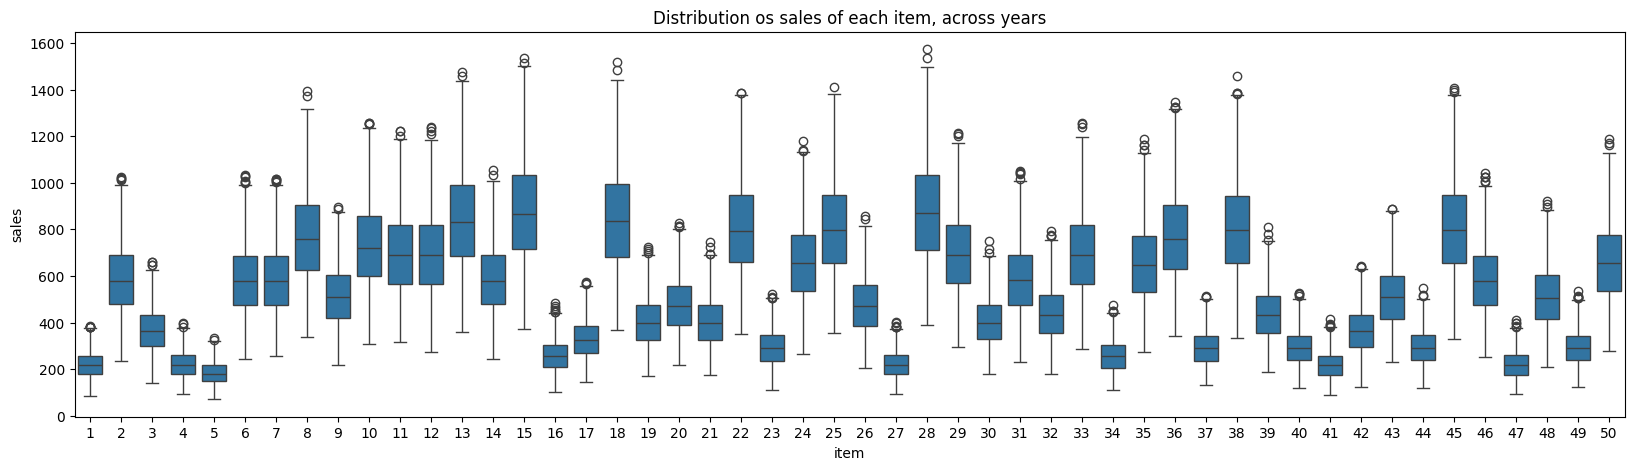

In [174]:
plt.figure(figsize=(20,5))
sns.boxplot(item_sum, x='item', y='sales')
plt.title('Distribution os sales of each item, across years')
plt.show()

In [177]:
# using plotly for boxplot
item_sum['item'] = item_sum['item'].astype('str')
px.box(item_sum, x='item', y='sales', title = 'Distribution os sales of each item, across years'
       , color=item_sum['item']).show()

In [182]:
# sales of each item over the dates

items = item_sum['item'].unique()

fig = px.line(
    item_sum[item_sum['item'] == items[0]],
    x = 'date',
    y = 'sales',
    title = f"Sales Over time for item_{items[0]}"
)

dropdown_buttons = [
    {
        'label': item,
        'method': 'update',
        'args': [
            {
                'x': [item_sum[item_sum['item'] == item]['date']],
                'y': [item_sum[item_sum['item'] == item]['sales']]
            },
            {'title': f"Sales Over time for item_{item}"}
        ]
    }
    for item in items
]


fig.update_layout(
    updatemenus = [
        {
            'buttons': dropdown_buttons,
            'direction': 'down',
            'showactive': False
        }
    ],
    xaxis_title = "Date",
    yaxis_title = "Sales"
)

fig.show()